In [4]:
%pylab inline
from scipy.optimize import minimize
from scipy.optimize import OptimizeResult
from scipy.io import loadmat
from sklearn.preprocessing import PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


# Load Data

In [5]:
ex3data1 = loadmat('ex3data1.mat')
X, y = ex3data1['X'], ex3data1['y']
# replace 10 class by 0
y[y[:,0] == 10, 0] = 0

# Display Data

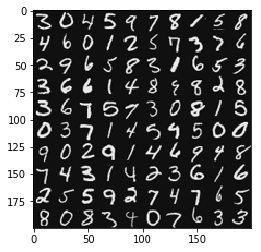

In [6]:
X_copy = X.copy('F')
np.random.shuffle(X_copy)
img = np.reshape(X_copy[:100], (10,10,20,20), 'F').transpose((0,2,1,3)).reshape((200,200))
f = plt.imshow(img, cmap='gray');

# Compute Cost and Gradient

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def costFunction(theta,X,y,lamb):
    m, _ = X.shape
    theta = theta.reshape((-1,1))
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (y.T.dot(np.log(h))+(1-y).T.dot(np.log(1-h))) + (lamb/(2*m)) * theta.T.dot(theta)
    return J

In [9]:
def gradientFunction(theta,X,y,lamb):
    m, _ = X.shape
    theta = theta.reshape((-1,1))
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h-y)
    grad[1:] += (lamb/m)*theta[1:]
    return grad.flatten()

## One-vs-all Training

In [10]:
def train(X,y,lamb):
    m,n = X.shape
    X = np.concatenate([np.ones((m,1)), X],axis=1)
    theta = np.zeros(n+1)
    classificator = np.zeros((10,n+1))
    for k in range(10):
        ys = (y == k).astype(int)
        result = minimize(fun=costFunction,x0=theta,args=(X,ys,lamb),jac=gradientFunction,method='cg')
        classificator[k] = result.x
    return classificator

## One-vs-all Prediction

In [11]:
def predict(X, classificator):
    m,n = X.shape
    X = np.concatenate([np.ones((m,1)), X], axis=1)
    return sigmoid(X.dot(classificator.T)).argmax(axis=1)

In [12]:
c = train(X,y,0.5)
accuracy = np.mean(predict(X,c).reshape((-1,1)) == y)
print(f'The classificator has an accuracy of {accuracy * 100}%')

The classificator has an accuracy of 94.96%


## Interactive Prediction

In [88]:
%run canvas_widget.ipynb

<IPython.core.display.Javascript object>

HelloWidget()

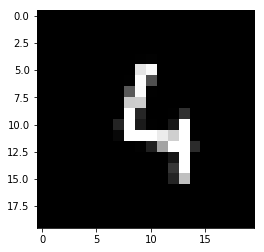

4

In [89]:
pixels = 1 - np.asfortranarray(np.reshape(w.pixels, (20,20)))
plt.imshow(pixels, cmap='gray');
plt.show()
predict(pixels.reshape((1,-1),order='F'), c)[0]